In [1]:
import torch
import matplotlib.pyplot as plt

from src.zipdata import MeaData

from src.unit import unit
from src.model import Model

In [2]:
# 0.1 build steven operators
spin=4.5

model = Model(spin=spin, g=torch.tensor([2.0, 2.0, 2.0]))

# 0.2 build CEF parameters, unit : K
B2 = unit.kB * torch.tensor([3.129e-2, 0.0, -3.909e-2, 0.0, 0.0])
B4 = unit.kB * torch.tensor([-2.080e-3, 0.0, -3.477e-3, 0.0, -7.703e-4, 0.0, 0.0, 0.0, 0.0])
B6 = unit.kB * torch.tensor([-9.551e-5, 0.0, 6.643e-5, 0.0, -1.331e-4, 0.0, 3.402e-6, 0.0, 0.0, 0.0, 0.0,  0.0, 0.0])

# set the parameters for the model
model.set_aCEF(B2, B4, B6)


the steven operator for s=4.5 is successfully built
set CEF parameters successful


In [3]:
# 6.1. with the optimized parameters, calculate energy levels and associated wave functions
B0 = torch.tensor([0.0])
enr, psi = model.solve(B0)
# enr unit : [K]
# if the format is not so tidy up, try to copy the output to normal `txt` file

      Eigenvalue       |      |4.5>      |      |3.5>      |      |2.5>      |      |1.5>      |      |0.5>      |     |-0.5>      |     |-1.5>      |     |-2.5>      |     |-3.5>      |     |-4.5>     
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        0.0000         | +0.8725+0.0000j | -0.0000+0.0000j | +0.3942+0.0000j | +0.0000+0.0000j | -0.2171+0.0000j | -0.0000+0.0000j | +0.1900+0.0000j | -0.0000+0.0000j | +0.0098+0.0000j | -0.0000+0.0000j
        0.0000         | -0.0000+0.0000j | -0.0098+0.0000j | -0.0000+0.0000j | -0.1900+0.0000j | -0.0000+0.0000j | +0.2171+0.0000j | +0.0000+0.0000j | -0.3942+0.0000j | +0.0000+0.0000j | -0.8725+0.0000j
        2.4632         | +0.0156+0.0000j | -0.2113+0.0000j | -0.0070+0.0000j | +0.4232+0.0000j | +0.0344+0.0000j | -0.7880+0.0000j | -0.0185+0.0000j | +0.1592+0.0000j | +0.0092+0.0000j | -

In [4]:
# 1.1 measure u, c
kT = torch.linspace(10, 100, 400)
B0 = torch.tensor([0.0])

u, c = model.measure_uc(kT, B0)
# unit:
# [c] : J K^{-1} mol^{-1}

# save the state
cdata = MeaData()
cdata.create(kT, c, B0)
cdata.write('cv')


data is successfully written into "cv-0.00.dat"


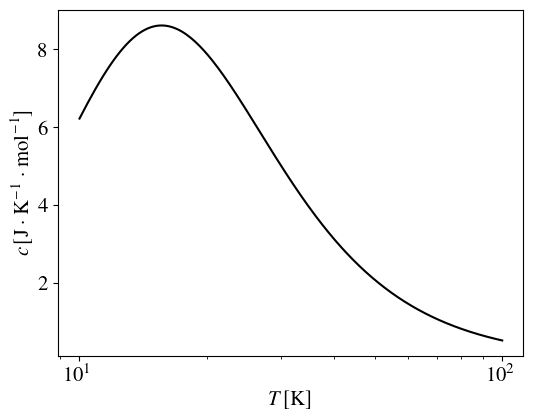

In [5]:
# 1.2. plot
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['font.size'] = 15

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,newtxtext,newtxmath,bm}'
plt.rcParams['font.family'] = 'TeX Gyre Termes'

plt.semilogx(kT.data, c.data, 'k-')
plt.xlabel(r"$T[\rm{K}]$")
plt.ylabel(r"$c[{\rm J}\cdot{\rm K}^{-1}\cdot{\rm mol}^{-1}]$")

# plt.legend()
plt.savefig('cv.png', dpi=300, transparent=True)

plt.show()

In [6]:
# 2.1. measure m, chi
kT = torch.linspace(10, 100, 400)
B0 = torch.tensor([0.01])   # unit : T

# eff : if use the effective chi
m, chi = model.measure_mchi(kT, B0, eff=False)
# unit :
# chi : [emu mol^{-1}] CGS

chidata = MeaData()
chidata.create(kT, chi, B0)
chidata.write('chi')


data is successfully written into "chi-0.01.dat"


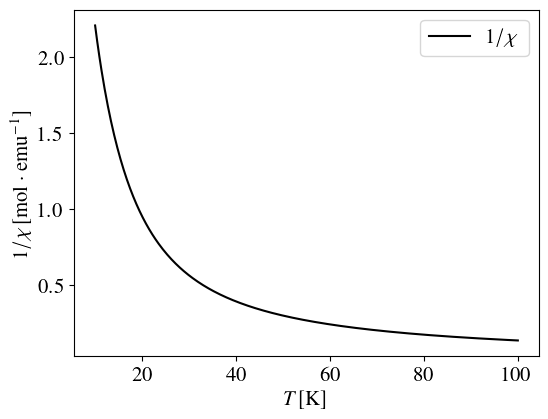

In [7]:
# 2.2. plot
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['font.size'] = 15

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,newtxtext,newtxmath,bm}'
plt.rcParams['font.family'] = 'TeX Gyre Termes'

plt.plot(kT.data, chi.data, 'k-', label='$1 / \chi$')
plt.xlabel(r"$T[\rm{K}]$")
plt.ylabel(r"$1 / \chi[{\rm mol} \cdot {\rm emu}^{-1}]$")

plt.legend()
plt.savefig('chi.png', dpi=300, transparent=True)
plt.show()